# KNN Modeling Exercise

In [1]:
import prepare
import acquire

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

## Instructor's review of NKK Modeling

In [2]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())

/Users/zach/codeup/cohorts/florence/classification-exercises/prepare.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


In [3]:
x_cols = ['pclass', 'age', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [4]:
def get_classification_metrics(model):
    '''
    Returns a dictionary of classification metrics on the validate split given a fitted model.
    
    Relies on X_validate and y_validate being globally defined.
    '''
    predictions = model.predict(X_validate)
    return {
        'tpr/recall': recall_score(y_validate, predictions),
        'tnr/specificity': recall_score(y_validate, predictions, pos_label=0),
        'fpr': 1 - recall_score(y_validate, predictions, pos_label=0),
        'fnr': 1 - recall_score(y_validate, predictions),
        'f1': f1_score(y_validate, predictions),
    }

In [5]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
get_classification_metrics(knn)

{'tpr/recall': 0.5853658536585366,
 'tnr/specificity': 0.75,
 'fpr': 0.25,
 'fnr': 0.41463414634146345,
 'f1': 0.5889570552147239}

In [6]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
get_classification_metrics(knn)

{'tpr/recall': 0.4024390243902439,
 'tnr/specificity': 0.8257575757575758,
 'fpr': 0.1742424242424242,
 'fnr': 0.5975609756097561,
 'f1': 0.4782608695652174}

In [7]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
get_classification_metrics(knn)

{'tpr/recall': 0.4146341463414634,
 'tnr/specificity': 0.8863636363636364,
 'fpr': 0.11363636363636365,
 'fnr': 0.5853658536585367,
 'f1': 0.5190839694656488}

## Visualize Performance as a function of k

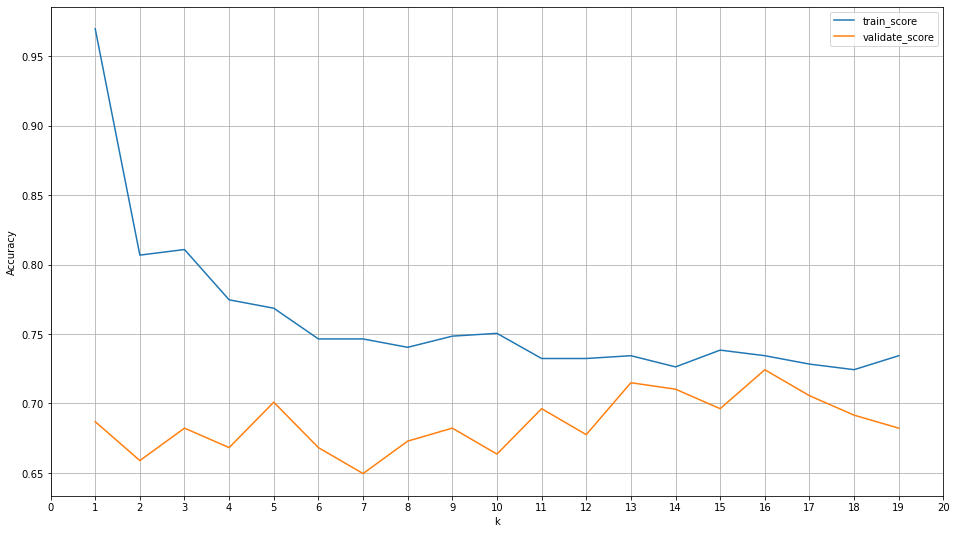

In [8]:
def eval_knn_model(k):
    '''
    For a given k, fits a k-neighbors classifier with the given k value and
    returns metrics about the model's performance.
    
    Returns a dictionary of k, training accuracy, and validate accuracy.
    
    Relies on X_train, y_train, X_validate, and y_validate being globally defined.
    '''
    knn = KNeighborsClassifier(k).fit(X_train, y_train)
    return {
        'k': k,
        'train_score': knn.score(X_train, y_train),
        'validate_score': knn.score(X_validate, y_validate),
    }

results = pd.DataFrame([eval_knn_model(k) for k in range(1, 20)])
results.set_index('k').plot(figsize=(16, 9))
plt.ylabel('Accuracy')
plt.xticks(range(21))
plt.grid()